<b>------------------------</b><br>
(C) 08/2017 by Andy Mai<br>
Email: andymai.ca@aol.com<br>
San Jose, CA - Capital of Silicon Valley<br>
<b>------------------------</b>
# Craigslist - Apartments' Rental Prices in SF Bay Area
### Get information from Craigslist to Python via HTML Get and BeautifulShoup API
In this example, we will get information about apartments' rental prices in SF Bay Area (California)

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import requests
from bs4 import BeautifulSoup as bs4

## We will do step by step how to get information from Craigslist.
Assume that we would like to get data of apartments with 01 bedroom and already furnished

## STEP 01: Prepare the URL in order to GET information
* The base will be stored in <strong>url_base</strong> variable
* The extension for HTML GET will be stored in <b>params</b>
<br>After that you can see the full URL will be passed as below:
<br><i>https://sfbay.craigslist.org/search/apa?s=120&is_furnished=1&bedrooms=1
</i>

In [3]:
url_base = 'https://sfbay.craigslist.org/search/apa'
params = dict(bedrooms=1, is_furnished=1)
resq = requests.get(url_base, params=params)
# We have the full URL:
print (resq.url)

https://sfbay.craigslist.org/search/apa?bedrooms=1&is_furnished=1


We will use BeautifulSoup API to simplify the content of what we get from Craigslist

In [4]:
html = bs4(resq.text, 'html.parser')
print(html.prettify()[:900])

﻿
<!DOCTYPE html>
<html class="no-js">
 <head>
  <title>
   SF bay area apts/housing for rent  - craigslist
  </title>
  <meta content="SF bay area apts/housing for rent  - craigslist" name="description">
   <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
   <link href="https://sfbay.craigslist.org/search/apa" rel="canonical">
    <link href="https://sfbay.craigslist.org/search/apa?format=rss&amp;is_furnished=1&amp;min_bedrooms=1" rel="alternate" title="RSS feed for craigslist | SF bay area apts/housing for rent  - craigslist " type="application/rss+xml">
     <link href="https://sfbay.craigslist.org/search/apa?s=120&amp;is_furnished=1&amp;min_bedrooms=1" rel="next">
      <meta content="width=device-width,initial-scale=1" name="viewport">
       <link href="//www.craigslist.org/styles/cl.css?v=d76fe4376346bd1b2503fb10181051a7" media="all" rel="stylesheet" type="text/css">
       


## STEP 02: Get necessary information from the web
We can see that every single post will be stored in <b>p</b> attribute with class <b>result-info</b><br>
From that observation, we can retrieve all information by getting them from this attribute.

In [5]:
apts = html.find_all('p', attrs={'class':'result-info'})
print(len(apts))

120


<b>apts</b> is a list of 120 renting objects. We can take one out for our sample. We work on this sample to have the sense how to apply all these things to the whole list.

In [6]:
this_aprt = apts[15]
print(this_aprt)

<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2017-08-04 14:44" title="Fri 04 Aug 02:44:54 PM">Aug  4</time>
<a class="result-title hdrlnk" data-id="6250180150" href="/scz/apa/d/furnished-two-room-apt-1000/6250180150.html">!!!! FURNISHED TWO ROOM APT 1000 sf $2,600 PRIVATE ENTRANCE!!!!</a>
<span class="result-meta">
<span class="result-price">$2600</span>
<span class="housing">
                    2br -
                    1000ft<sup>2</sup> -
                </span>
<span class="result-hood"> (capitola)</span>
<span class="result-tags">
                    pic
                    <span class="maptag" data-pid="6250180150">map</span>
</span>
<span class="banish icon icon-trash" role="button">
<span class="screen-reader-text">hide this posting</span>
</span>
<span aria-hidden="true" class="unbanish icon icon-trash red" role="button"></span>
<a class="restore-link"

### We get the information about number of bedroom and area

In [7]:
size = this_aprt.find_all(attrs={'class':'housing'})[0].text
print(size)


                    2br -
                    1000ft2 -
                


### We will create a function to get those information and store into apt_size and n_brs variables:

In [8]:
def size_brs(size):
    split_var = size.strip('\n ').strip('\n - ').split('-')
    if len(split_var) == 2:
        n_brs = split_var[0].replace('br', '')
        apt_size = split_var[1].replace('ft2', '')
    elif 'br' in split_var[0]:
        n_brs = split_var[0].replace('br', '')
        apt_size = np.nan
    elif 'ft2' in split_var[1]:
        apt_size = split_var[1].replace('ft2', '')
        n_brs = np.nan
    return float(apt_size), float(n_brs)

In [9]:
apt_size, n_brs = size_brs(size)

In [10]:
time = this_aprt.find('time')['datetime']
time = pd.to_datetime(time)

In [11]:
price = float(this_aprt.find('span', {'class':'result-price'}).text.strip('$'))

In [12]:
title = this_aprt.find('a', {'class':'result-title hdrlnk'}).text

In [13]:
link = this_aprt.find('a', {'class':'result-title hdrlnk'})['href']

## STEP 03: Put everything into an array then we have done!
We have all relevant information we need to know about apartments' rental price in SF Bay Area. We just display it to make sure that everything is correct.

In [14]:
print('\n'.join([str(i) for i in [apt_size, n_brs, time, price, title]]))

1000.0
2.0
2017-08-04 14:44:00
2600.0
!!!! FURNISHED TWO ROOM APT 1000 sf $2,600 PRIVATE ENTRANCE!!!!


# Apply everything will did above to the whole list of rental objects.
* Object: is every single apartment posted on Craigslist that we are working on.
* Each page will show 120 objects by default.
* We can iterate over 1000 objects to get the information

In [15]:
page_index = np.arange(0, 1000, 120)

In [16]:
def set_price(x): # Avoid getting None value
    price = x.find('span', {'class':'result-price'})
    if price is not None:
        price = float(price.text.strip('$'))
    else:
        price = np.nan
    return price

def set_time(x): # Avoid getting None value
    time = x.find('time')['datetime']
    if time is not None:
        time = pd.to_datetime(time)
    else:
        time = np.nan
    return time

### Some notices in this step:
* We need to have a delay when we query Craigslist because if we keep querying too often, our IP address will be blocked (to avoid DDoS attack). In this step, I set the delay time is 1 second for each query.
* In params, <b>s</b> parameter indicates the page we are currently working on. By increasing this variable, we will iterate over 1000 objects via multiple pages.
* After everything's done, we store the result into <b>result</b> array. This is the input data for us to put in pandas DataFrame for later analytics purpose.

In [17]:
import time as tp
result = []
for j in page_index:
    url_base = 'https://sfbay.craigslist.org/search/apa'
    params = dict(bedrooms=1, is_furnished=1,s=j)
    resq = requests.get(url_base, params=params)
    html = bs4(resq.text, 'html.parser')
    apts = html.find_all('p', attrs={'class':'result-info'})
    for this_aprt in apts:
        size = this_aprt.find_all(attrs={'class':'housing'})[0].text
        apt_size, n_brs = size_brs(size)
        time = set_time(this_aprt)
        price = set_price(this_aprt)
        title = this_aprt.find('a', {'class':'result-title hdrlnk'}).text
        link = this_aprt.find('a', {'class':'result-title hdrlnk'})['href']
        data = np.array([time, price, apt_size, n_brs,title, link])
        result.append(data)
    tp.sleep(1)

### Put everything into Pandas DataFrame

In [18]:
col_names = ['time', 'price', 'size', 'brs', 'title', 'link']
result = pd.DataFrame(data=result, columns=col_names)
result.set_index('time')
result.head()

,time,price,size,brs,title,link
0,2017-08-04 16:01:00,5250.0,1600.0,2.0,Two-floor enchanting home-like flat with panor...,/sfc/apa/d/two-floor-enchanting-home/622731578...
1,2017-08-04 15:56:00,1800.0,430.0,1.0,430 Studio with Walk in Closet,/sby/apa/d/430-studio-with-walk-in-closet/6250...
2,2017-08-04 15:55:00,3495.0,NaN,1.0,Fully Furnished 1-Bed Apt in Sunnyvale! Parkin...,/sby/apa/d/fully-furnished-1-bed-apt-in/624386...
3,2017-08-04 15:54:00,5000.0,NaN,2.0,$5000 / 2br - 2 Bedroom/1.5 Bath with Showstop...,/sfc/apa/d/5000-2br-2-bedroom15-bath/624721108...
4,2017-08-04 15:38:00,2000.0,1830.0,4.0,It features a freshly painted large living room!!,/nby/apa/d/it-features-freshly-painted/6250241...


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[(0, 12000)]

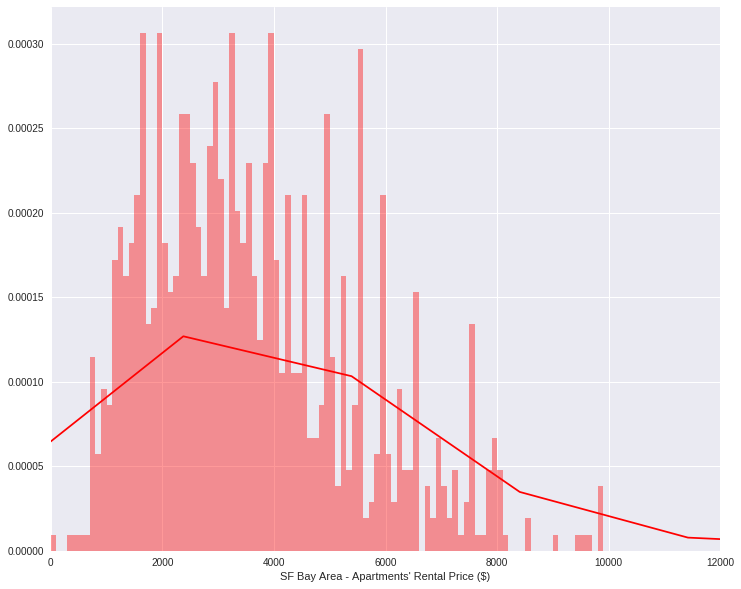

In [21]:
plt.figure(figsize=(12,10))
sns.distplot(result.price.dropna(),bins=np.arange(0, 10000, 100),color='red',axlabel='SF Bay Area - Apartments\' Rental Price ($)').set(xlim=(0, 12000))

## The above plot is to show the distribution of rental prices of apartments in SF Bay Area